In [ ]:
!pip install pyopenms 
!pip install molmass

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd 
from pyopenms import *
from molmass import Formula 


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#One

Output a list of all of the masses detected in the spectrum 


In [ ]:
def returnmzlist(raw):
  exp = MSExperiment()
  MzDataFile().load(raw, exp)
  lenlist=[]
  for i in range (1,1988):
    mzlist=[]
    spectrum=exp.getSpectrum(i)
    mz = spectrum.get_peaks()
    mzlist=[item.tolist() for item in mz]
    mzlistfin=mzlist[0]
    lenlist.append(len(mzlistfin))
  bestind=lenlist.index(max(lenlist))
  spec = exp.getSpectrum(bestind)
  mz = spectrum.get_peaks()
  mzlistraw=[item.tolist() for item in mz]
  mzlist=mzlist[0]
  return mzlist



masses = returnmzlist("/content/gdrive/MyDrive/XCMS/data/20220624_strepcolumn_thioredoxinmutant_pool3_control.mzdata.xml")

#Two 
Search for peaks at every mass and append to plot if intensity is greater than a threshold 

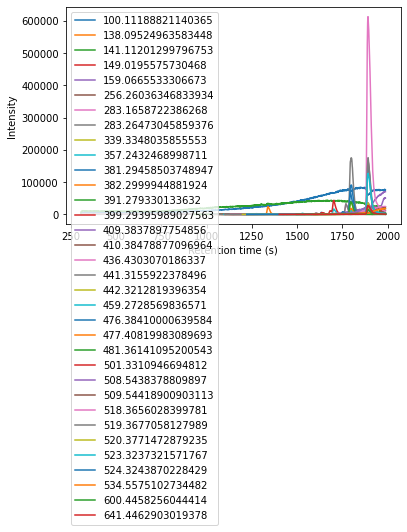

In [ ]:
def plotDetectedFeatures3D(raw,weights):
  rtforplot=list(range(1, 1990,1))
  exp = MSExperiment()
  MzDataFile().load(raw, exp)
  for mass in weights:
    intenforplot=[]
    rtlist=[]
    for i in range (1,1988):
      spectrum=exp.getSpectrum(i)
      mz, intensity = spectrum.get_peaks()
      for m in mz:
        if m>(mass-0.1) and m<(mass+0.1):
          index=np.where(mz==m)
          #print(index[0])
          intenforplot.append(intensity[index[0][0]])
          rtlist.append(i)
          break
    #plt.figure(figsize=(20,16)) 
    if max(intenforplot)>10000:
      plt.plot(rtlist,intenforplot,label=mass)
    #plt.title(compounds[comind])
  #plt.figure(figsize=(20,16))
  plt.xlabel("Retention time (s)")
  plt.ylabel("Intensity")
  plt.legend()
  plt.savefig("/content/gdrive/MyDrive/XCMS/plots/20220608_pool5_hiscolumn_exp.pdf")


plotDetectedFeatures3D("/content/gdrive/MyDrive/XCMS/data/20220624_strepcolumn_thioredoxinmutant_pool3_control.mzdata.xml",masses)